# Imports

In [1]:
from pybaseball import spraychart
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
lemahieu = pd.read_csv('../data/dj-lemahieu.csv')
lemahieu.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(lemahieu.shape)
lemahieu.head(2)

(2660, 89)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,swing_miss
0,FF,2021-09-30,94.6,2.52,6.01,"LeMahieu, DJ",518934,592662,out,hit_into_play,4.0,"DJ LeMahieu grounds out, pitcher Robbie Ray to...",R,R,L,TOR,NYY,X,1.0,ground_ball,2,2,2021,0.58,16.8,-0.41,2.26,NaN,NaN,NaN,0,6,Top,125.23,174.2,672386,-8.967141,-137.344258,-7.214463,9.393418,30.578281,-13.014533,3.55,1.63,17.0,97.0,-7.0,94.9,2307.0,6.6,632280,592662,672386,665489,543760,669289,666182,606192,543807,545341,53.90,0.229,0.209,0.0,1.0,0.0,0.0,2.0,42,5,4-Seam Fastball,2,1,1,2,1,2,1,2,Standard,Standard,147.0,0.036,-0.216,1,2-2,0.41,-6.96,0
1,FF,2021-09-30,93.7,2.27,6.10,"LeMahieu, DJ",518934,592662,NaN,foul,2.0,"DJ LeMahieu grounds out, pitcher Robbie Ray to...",R,R,L,TOR,NYY,S,NaN,NaN,2,1,2021,0.64,20.4,-0.23,2.97,NaN,NaN,NaN,0,6,Top,NaN,NaN,672386,-7.898378,-136.022139,-6.038572,9.772864,32.533131,-9.968247,3.55,1.63,198.0,74.6,55.0,93.5,2298.0,6.5,632280,592662,672386,665489,543760,669289,666182,606192,543807,545341,53.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,4,4-Seam Fastball,2,1,1,2,1,2,1,2,Standard,Standard,150.0,0.000,-0.066,1,2-1,0.23,-7.68,0


In [3]:
zero_zero = lemahieu.loc[(lemahieu['pitch_count'] == '0-0')]
zero_zero.description.value_counts()

called_strike      270
ball               259
hit_into_play       63
foul                62
swinging_strike     20
hit_by_pitch         4
Name: description, dtype: int64

In [4]:
# Feature engineer first_pitch_take column by taking count and if pitch was called a strike
lemahieu['first_pitch_take'] = [1 if x == '0-0' and y == 'called_strike' else 0 for (x, y) 
                                in zip(lemahieu['pitch_count'], 
                                       lemahieu['description'])]

# feature engineer first_pitch_swing column by taking count, if launch speed is > 0 or if swing_miss = 1
lemahieu['first_pitch_swing'] = [1 if x == '0-0' and (y > 0 or z > 0) else 0 for (x, y, z) 
                                 in zip(lemahieu['pitch_count'], 
                                        lemahieu['launch_speed'],
                                        lemahieu['swing_miss'])]

In [5]:
lemahieu.groupby(['bb_type']).mean()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,swing_miss,first_pitch_take,first_pitch_swing
bb_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fly_ball,87.246739,-0.397174,5.898261,518934.0,598982.107527,5.858696,8.383721,1.161290,1.215054,2021.0,0.305435,7.228696,-0.147065,2.530652,609245.800000,583563.00000,581928.076923,0.827957,4.827957,156.140860,89.418387,602025.193548,-0.058052,-126.941036,-3.177157,3.058775,26.163486,-24.447373,3.55,1.63,306.087912,90.695604,37.285714,87.319565,2302.467391,6.351087,633404.075269,598982.107527,602025.193548,616497.548387,612704.645161,612972.677419,620042.806452,637942.376344,622789.881720,618155.301075,54.149674,0.195857,0.304637,0.240860,1.0,0.075269,0.290323,3.769231,37.010753,3.655914,2.258065,2.161290,2.301075,2.118280,2.225806,2.333333,2.440860,2.118280,149.782609,-0.004000,-0.065484,1.0,0.147065,-3.665217,0.0,0.0,0.139785
ground_ball,88.876426,-0.502433,5.746198,518934.0,596580.905303,7.577947,5.159091,1.136364,1.140152,2021.0,-0.185361,5.984487,-0.055133,2.250304,579303.631579,580359.54902,555392.875000,0.810606,4.549242,124.216894,148.710492,588764.170455,1.567255,-129.274066,-3.596613,-2.796376,26.953999,-25.241141,3.55,1.63,27.756654,89.217490,-15.228137,88.976046,2186.996198,6.361977,633476.541667,596580.905303,588764.170455,621148.109848,600624.136364,616206.950758,610313.916667,630252.893939,616872.443182,610060.560606,54.140228,0.247544,0.229274,0.225568,1.0,0.238636,0.011364,2.326996,34.477273,3.473485,1.746212,2.000000,2.034091,1.712121,2.015152,1.795455,2.098485,1.712121,178.688213,0.002405,-0.073746,1.0,0.055133,2.224335,0.0,0.0,0.125000
line_drive,88.103676,-0.676324,5.742500,518934.0,600587.580882,7.080882,7.900763,1.176471,1.308824,2021.0,0.088824,7.297941,0.035956,2.332353,563255.076923,585648.48000,553033.647059,0.823529,4.507353,145.872647,99.547279,592386.558824,1.580447,-128.158513,-3.495391,0.137187,26.548151,-24.083809,3.55,1.63,250.772059,94.430147,15.794118,88.160294,2234.272059,6.330882,633390.110294,600587.580882,592386.558824,621496.117647,602297.169118,618018.845588,612870.536765,629757.610294,620202.816176,611829.500000,54.168971,0.642272,0.651074,0.617279,1.0,0.588235,0.191176,4.125000,34.169118,3.727941,2.058824,1.786765,1.669118,2.176471,1.926471,2.139706,1.889706,2.176471,164.926471,-0.008088,0.278544,1.0,-0.035956,-1.065882,0.0,0.0,0.110294
popup,86.553333,-1.076000,6.093333,518934.0,623774.866667,6.400000,4.266667,1.400000,1.133333,2021.0,0.010667,9.320000,-0.413333,2.541333,642180.000000,569684.00000,595506.666667,1.000000,4.000000,133.889333,162.240000,598165.533333,1.546832,-125.971254,-3.863978,-0.416833,25.965816,-22.859447,3.55,1.63,120.666667,78.340000,65.000000,86.673333,2085.266667,6.373333,633388.133333,623774.866667,598165.533333,630007.066667,604372.733333,612541.066667,637157.466667,645168.066667,621661.600000,619811.866667,54.126667,0.047200,0.043200,0.000000,1.0,0.000000,0.000000,2.866667,30.266667,3.533333,1.000000,1.866667,1.400000,1.466667,1.866667,1.000000,1.400000,1.466667,169.666667,-0.000533,-0.316000,1.0,0.413333,-0.128000,0.0,0.0,0.133333


In [6]:
lemahieu.pitch_type.value_counts(normalize=True)

FF    0.376757
SI    0.202051
SL    0.198633
CH    0.078238
FC    0.071781
CU    0.046715
FS    0.013293
KC    0.012533
Name: pitch_type, dtype: float64

In [7]:
full_count = lemahieu.loc[lemahieu['pitch_count'] == '3-2']
r_lemahieu = lemahieu.loc[lemahieu['p_throws'] == 'R']
l_lemahieu = lemahieu.loc[lemahieu['p_throws'] == 'L']

ff = lemahieu.loc[lemahieu['pitch_type'] == 'FF']
si = lemahieu.loc[lemahieu['pitch_type'] == 'SI']
sl = lemahieu.loc[lemahieu['pitch_type'] == 'SL']
ch = lemahieu.loc[lemahieu['pitch_type'] == 'CH']
fc = lemahieu.loc[lemahieu['pitch_type'] == 'FC']
cu = lemahieu.loc[lemahieu['pitch_type'] == 'CU']
# Split-Finger
fs = lemahieu.loc[lemahieu['pitch_type'] == 'FS']
kc = lemahieu.loc[lemahieu['pitch_type'] == 'KC']

r_ff = lemahieu.loc[(lemahieu['pitch_type'] == 'FF') & (lemahieu['p_throws'] == 'R')]
r_si = lemahieu.loc[(lemahieu['pitch_type'] == 'SI') & (lemahieu['p_throws'] == 'R')]
r_sl = lemahieu.loc[(lemahieu['pitch_type'] == 'SL') & (lemahieu['p_throws'] == 'R')]
r_ch = lemahieu.loc[(lemahieu['pitch_type'] == 'CH') & (lemahieu['p_throws'] == 'R')]
r_fc = lemahieu.loc[(lemahieu['pitch_type'] == 'FC') & (lemahieu['p_throws'] == 'R')]
r_cu = lemahieu.loc[(lemahieu['pitch_type'] == 'CU') & (lemahieu['p_throws'] == 'R')]
r_fs = lemahieu.loc[(lemahieu['pitch_type'] == 'FS') & (lemahieu['p_throws'] == 'R')]
r_kc = lemahieu.loc[(lemahieu['pitch_type'] == 'KC') & (lemahieu['p_throws'] == 'R')]

l_ff = lemahieu.loc[(lemahieu['pitch_type'] == 'FF') & (lemahieu['p_throws'] == 'L')]
l_si = lemahieu.loc[(lemahieu['pitch_type'] == 'SI') & (lemahieu['p_throws'] == 'L')]
l_sl = lemahieu.loc[(lemahieu['pitch_type'] == 'SL') & (lemahieu['p_throws'] == 'L')]
l_ch = lemahieu.loc[(lemahieu['pitch_type'] == 'CH') & (lemahieu['p_throws'] == 'L')]
l_fc = lemahieu.loc[(lemahieu['pitch_type'] == 'FC') & (lemahieu['p_throws'] == 'L')]
l_cu = lemahieu.loc[(lemahieu['pitch_type'] == 'CU') & (lemahieu['p_throws'] == 'L')]
l_fs = lemahieu.loc[(lemahieu['pitch_type'] == 'FS') & (lemahieu['p_throws'] == 'L')]
l_kc = lemahieu.loc[(lemahieu['pitch_type'] == 'KC') & (lemahieu['p_throws'] == 'L')]

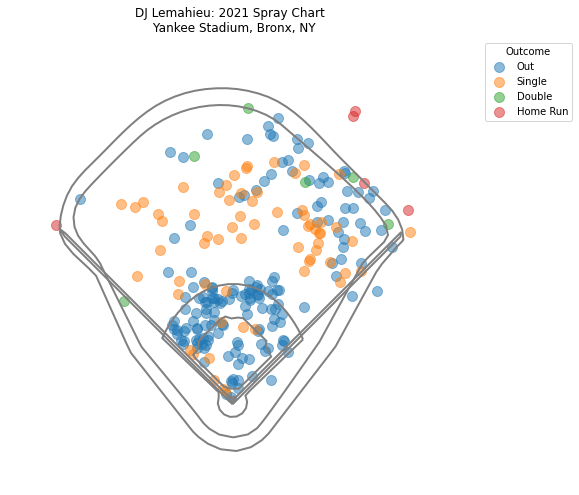

In [8]:
spray_ny = lemahieu[lemahieu['home_team'] == 'NYY']
spray_ny = spray_ny.loc[spray_ny['events'] != 'double_play']
spraychart(spray_ny, 'yankees', title = 'DJ Lemahieu: 2021 Spray Chart \n Yankee Stadium, Bronx, NY');

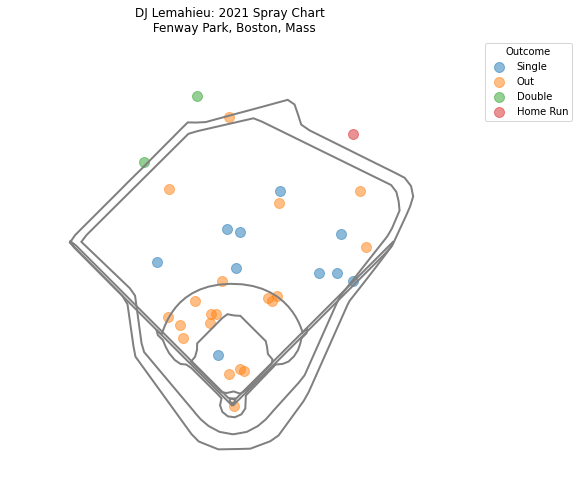

In [9]:
spray_data = lemahieu[lemahieu['home_team'] == 'BOS']
spray_data = spray_data.loc[spray_data['events'] != 'double_play']
spraychart(spray_data, 'red_sox', title = 'DJ Lemahieu: 2021 Spray Chart \n Fenway Park, Boston, Mass');

In [10]:
r_lemahieu.pitch_type.sort_values()

2245     CH
146      CH
1958     CH
2374     CH
1957     CH
       ... 
746     NaN
747     NaN
748     NaN
749     NaN
750     NaN
Name: pitch_type, Length: 1810, dtype: object

In [11]:
r_lemahieu.dropna(subset=['pitch_type'], inplace = True)

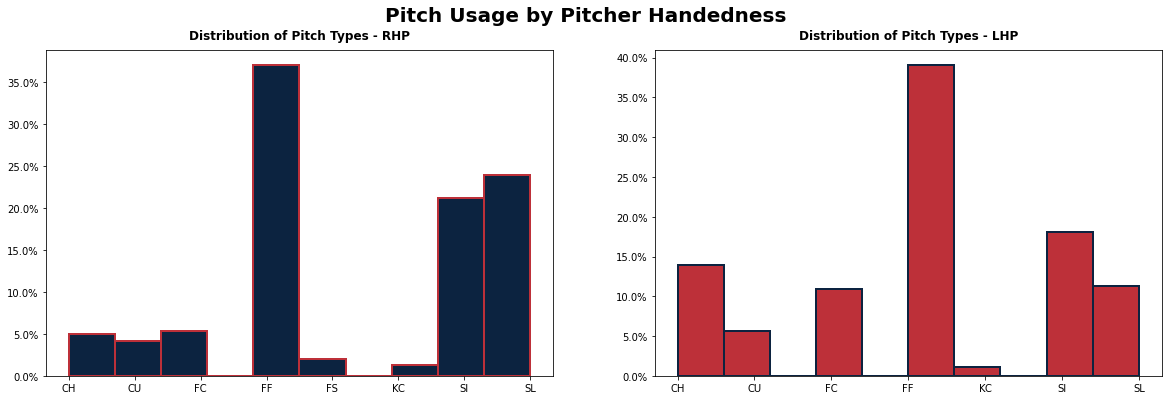

In [12]:
red = '#BD3039'
blue = '#0C2340'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Pitcher Handedness', fontsize = 20, fontweight = 'bold')

dist_r = r_lemahieu.pitch_type.sort_values()
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue, edgecolor = red, linewidth = 2)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHP', fontdict = font_title, pad = 15)

dist_l = l_lemahieu.pitch_type.sort_values()
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red, edgecolor = blue, linewidth = 2)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHP', fontdict = font_title, pad = 15);

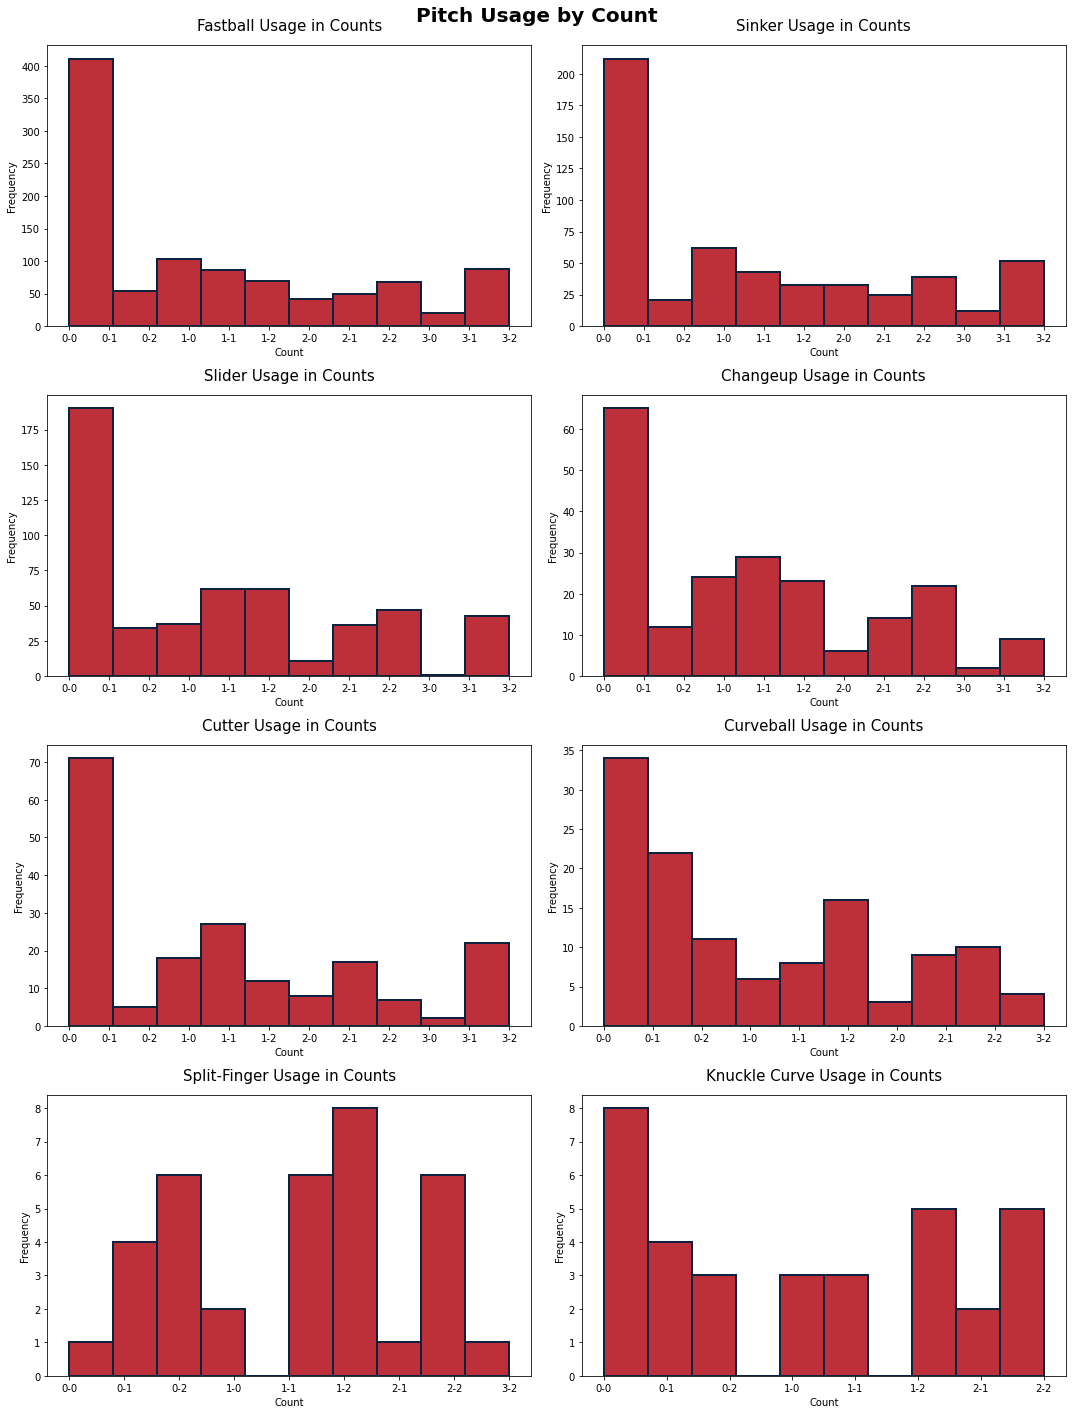

In [13]:
red = '#BD3039'
blue = '#0C2340'
fig, axs = plt.subplots(4, 2, figsize = (15, 20))
fig.suptitle('Pitch Usage by Count', fontsize = 20, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')

axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[0][0].set_title('Fastball Usage in Counts', fontsize = 15, pad = 15)

axs[0][1].hist(si['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[0][1].set_title('Sinker Usage in Counts', fontsize = 15, pad = 15)

axs[1][0].hist(sl['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[1][0].set_title('Slider Usage in Counts', fontsize = 15, pad = 15)

axs[1][1].hist(ch['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[1][1].set_title('Changeup Usage in Counts', fontsize = 15, pad = 15)

axs[2][0].hist(fc['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[2][0].set_title('Cutter Usage in Counts', fontsize = 15, pad = 15)

axs[2][1].hist(cu['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[2][1].set_title('Curveball Usage in Counts', fontsize = 15, pad = 15)

axs[3][0].hist(fs['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[3][0].set_title('Split-Finger Usage in Counts', fontsize = 15, pad = 15)

axs[3][1].hist(kc['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[3][1].set_title('Knuckle Curve Usage in Counts', fontsize = 15, pad = 15)
plt.tight_layout();